## Tutorial 3

Credit: Yen-Ling Kuo and Eugenio Piasini for the Brains, Minds and Machines summer course 2018.

### The XOR Problem

XOR or Exclusive OR is a classic problem in Artificial Neural Network Research. An XOR function takes two binary inputs (0 or 1) & returns True if both inputs are different & False if both inputs are same.

XOR is a classification problem and one for which the expected outputs are known in advance. Here, we relax the XOR problem a bit. Instead of binary inputs, we give inputs in real values.

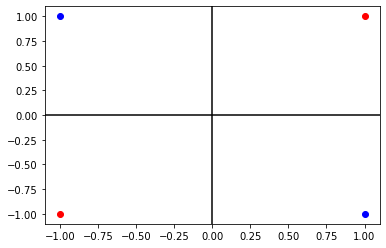

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# input of the MLP
X = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output of the MLP
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(X[i][0], X[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

This is how the training data looks like in a 2D plot. The red dot means the output label is 0, the blue dot means the output label is 1. Clearly, these data points are not linearly separable. We can not find one single line to classify the points correctly. We will thus build a multi-layer perceptron with nonlinearity to learn the right predictions.

### Activation functions

There are several activation functions to choose from, including sigmoid, tanh, relu, etc. Here, we implemented the sigmoid function as an example. In order to do backpropagation, we need to implement its derivative as well.

In [2]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

### Basic MLP architecture

The MLP consists of a hidden layer and an output layer to map the hidden vector to the output values. First, we initialize the weight and bias of each layer as well as the training epoch and learning rate. 

In [3]:
epoch = 5000 # number of training iterations
learning_rate = 0.1

# dimension of each layer
d_in = X.shape[1] # number of features in the input dataset
d_h = 3   # hidden layer
d_out = 1 # output layer

# weight and bias initialization
wh = np.random.uniform(size=(d_in, d_h))
bh = np.random.uniform(size=(1, d_h))
wout = np.random.uniform(size=(d_h, d_out))
bout = np.random.uniform(size=(1, d_out))

For each training iteration, we run one forward pass to get the predicted value and compute the loss between the prediction and the real value. For simplicity, we use the differences between the two values as the loss function. Then, we can compute the gradients and finally update the weights and biases.

In [4]:
for i in range(epoch):
    # Forward pass
    h = sigmoid(X.dot(wh) + bh)
    y_pred = sigmoid(h.dot(wout) + bout)
    
    # Compute and print loss
    loss = (y_pred - y).sum()
    if i % 500 == 0:
        print('Epoch', i, ':', loss)

    # Backpropagation to compute gradients
    grad_y_pred = (y - y_pred) * derivative_sigmoid(y_pred)
    grad_wout = h.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)
    grad_h = grad_y_pred.dot(wout.T) * derivative_sigmoid(h)
    grad_wh = X.T.dot(grad_h)
    grad_bh = np.sum(grad_h, axis=0, keepdims=True)

    # Update weights and biases
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate
    wh += grad_wh * learning_rate
    bh += grad_bh * learning_rate
    
print('Prediction of training data:')
print(y_pred)

Epoch 0 : 1.5222252835859607
Epoch 500 : 0.017860815674027863
Epoch 1000 : 0.04339963802517355
Epoch 1500 : 0.054306194776182704
Epoch 2000 : 0.03262657077390019
Epoch 2500 : 0.03492123330281907
Epoch 3000 : 0.026671347539797635
Epoch 3500 : 0.021619511722505813
Epoch 4000 : 0.018419187067126655
Epoch 4500 : 0.01621633964425656
Prediction of training data:
[[0.05414794]
 [0.94111428]
 [0.07824901]
 [0.94109164]]


The predicted values are very close to the labels in the training data. Since they are real values, to get the binary output, we can simply threshold the output to decide which label we want to assign.

### Exercise 1: Variant of XOR Problem

Here we will build our variant of the XOR classifier. We will use data points ranging between -10 and 10 for trainig.

Please refer to the Extended version to find some extra information and PyTorch implementation details. 

In [5]:
import random
random.seed(1)

x_train = []
y_correct = []
for i in range(100):
    x0 = random.randint(-10, 10)
    x1 = random.randint(-10, 10)
    label = 0 if x0 * x1 > 0 else 1
    x_train.append([x0, x1])
    y_correct.append(label)
x_train = np.asarray(x_train)
y_correct = np.asarray(y_correct)

Next, try to implement the structure of the classifier. You can use the architecture in our first example, which consists of a hidden and an output layer.

To apply sigmoid function, you can use [`torch.sigmoid`](https://pytorch.org/docs/stable/torch.html#torch.sigmoid).

In [19]:
import torch.nn as nn

class XorClassifier(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(XorClassifier, self).__init__() 
        # TODO: please initialize the layers here
        self.lin1 = nn.Linear(input_dim,2)
        self.lin2 = nn.Linear(2,output_dim)

    def forward(self, x):
        # TODO: please build your forward pass here
        x = self.lin1(x)
        x = sigmoid(x)
        x = self.lin2(x)
        return x

In the XOR variant, differently from what we did before (in regression), we get the network to output two values to indicate the probability distribution over the two possible labels instead of one real value. 

So, we set the output dimension to 2 and use cross-entropy as loss function ([`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss)) because it is useful when training a classification problem with N classes.

We also try a different optimizer this time. [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) is an adaptive optimization algorithm. You can try to compare Adam with SGD as well!

In [20]:
import torch.optim as optim

model = XorClassifier(2, 2)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

epochs = 5000

Let's complete the final part of the training script to learn the classifier.

In [25]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train).type(torch.FloatTensor)
    labels = torch.from_numpy(y_correct)
    
    # TODO: please complete the training script
    optimizer
    y_pred = model(inputs)
    loss = criterion.forward()

    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        
        

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

Since we're predicting the distribution over the labels, we need to take the index of the max value as the predicted label. Then, we can draw the predictions in a 2D plot. If your model learns well, you will see that most dots in the 1st and 3rd quadrants are red, and most dots in the 2nd and 4th quadrants are blue.

In [22]:
outputs = model.forward(torch.from_numpy(x_train).type(torch.FloatTensor))
_, predicted = torch.max(outputs, 1)

fig, ax = plt.subplots()
for i in range(y_correct.shape[0]):
    if predicted[i] == 0:
        marker = 'ro'
    else:
        marker = 'bo'
    ax.plot(x_train[i][0], x_train[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

### Exercise 2:



Consider what might happen if you attempted to solve the original XOR problem (with 4 examples) using a network with no hidden layer and a single linear output neuron.

What would be the simplest modification you'd make to the architecture of the above network, such as adding one or two hidden neurons, in order to learn the XOR problem?



### Extra: MNIST classification

**Dataset**


- MNIST dataset.


- There are 28*28 images and 10 labels from 0 to 9.


- Data is not normalized so we divide each image to 255 that is basic normalization for images.


- In order to split data, we use **train_test_split** method from sklearn library


- Size of train data is 80% and size of test data is 20%.


- Create **feature** and **target tensors**.


- **TensorDataset()**: Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.

- **DataLoader()**: It combines dataset and sampler. It also provides multi process iterators over the dataset.


**ANN Model**

- We add 3 hidden layers.

- We use ReLU, Tanh and ELU activation functions for variety.

**Model Class**

- input_dim = 2828 # size of image pxpx


- output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9


- Hidden layer dimension is 150 (there is no reason). Hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.


**Loss Class**

- Cross entropy loss

- It has softmax (logistic function) in it.

**Optimizer Class**

- SGD Optimizer

**Traning the Model**

**Prediction**

As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning (training).

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split

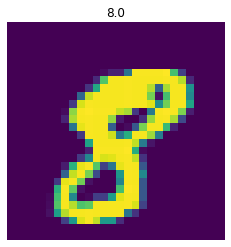

In [28]:
train = pd.read_csv("train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [42]:
# ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
 
        out = self.fc1(x)
   
        out = self.relu1(out)
        
   
        out = self.fc2(out)
  
        out = self.tanh2(out)
        
  
        out = self.fc3(out)
   
        out = self.elu3(out)
        
      
        out = self.fc4(out)
        return out

In [43]:
# instantiate ANN
input_dim = 28*28
hidden_dim = 150 
output_dim = 10

In [44]:
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

In [45]:
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

In [46]:
# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [47]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7598904371261597  Accuracy: 77.8452377319336 %
Iteration: 1000  Loss: 0.4943181276321411  Accuracy: 86.86904907226562 %
Iteration: 1500  Loss: 0.22674016654491425  Accuracy: 89.29762268066406 %
Iteration: 2000  Loss: 0.3026455044746399  Accuracy: 90.20237731933594 %
Iteration: 2500  Loss: 0.2986562252044678  Accuracy: 91.78571319580078 %
Iteration: 3000  Loss: 0.1267756223678589  Accuracy: 92.45237731933594 %
Iteration: 3500  Loss: 0.24899335205554962  Accuracy: 93.26190185546875 %
Iteration: 4000  Loss: 0.0648273155093193  Accuracy: 93.80952453613281 %
Iteration: 4500  Loss: 0.29660794138908386  Accuracy: 94.48809814453125 %
Iteration: 5000  Loss: 0.10217588394880295  Accuracy: 94.76190185546875 %
Iteration: 5500  Loss: 0.20003995299339294  Accuracy: 94.86904907226562 %
Iteration: 6000  Loss: 0.20656165480613708  Accuracy: 95.13095092773438 %
Iteration: 6500  Loss: 0.10099989175796509  Accuracy: 95.47618865966797 %
Iteration: 7000  Loss: 0.12254156172275543  Ac

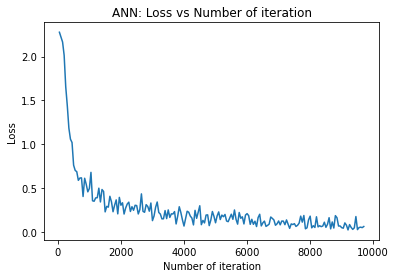

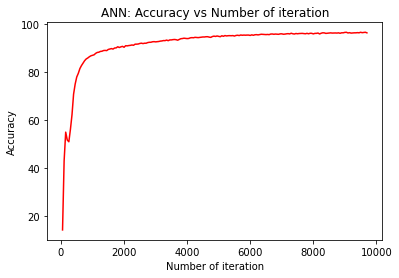

In [48]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()